# Repaso Machine Learning - Aprendizaje Supervisado - Regresion

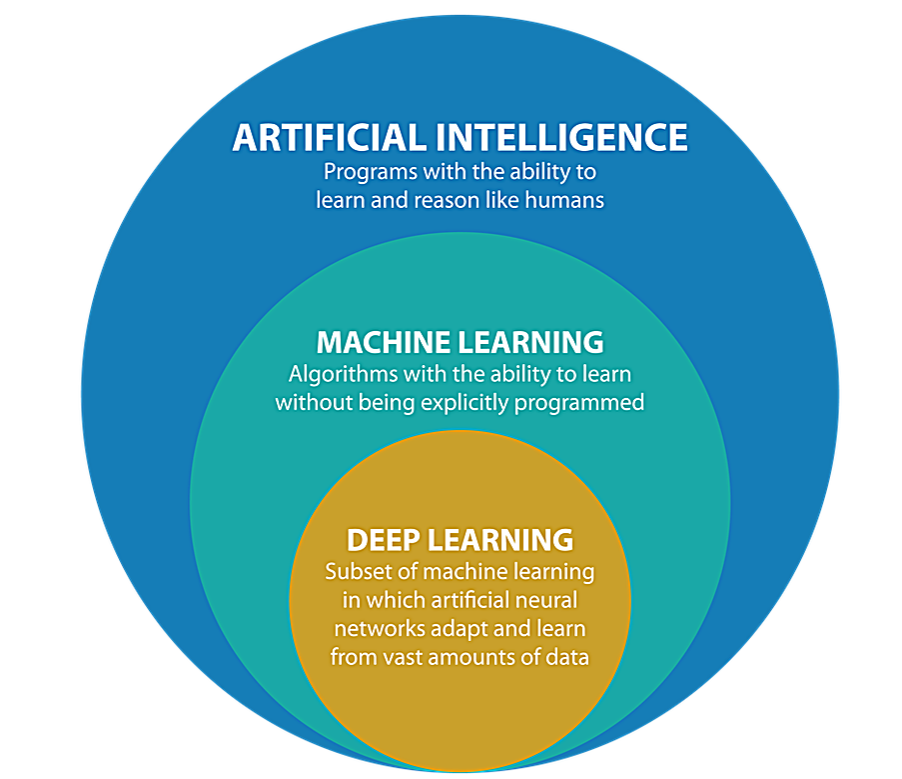

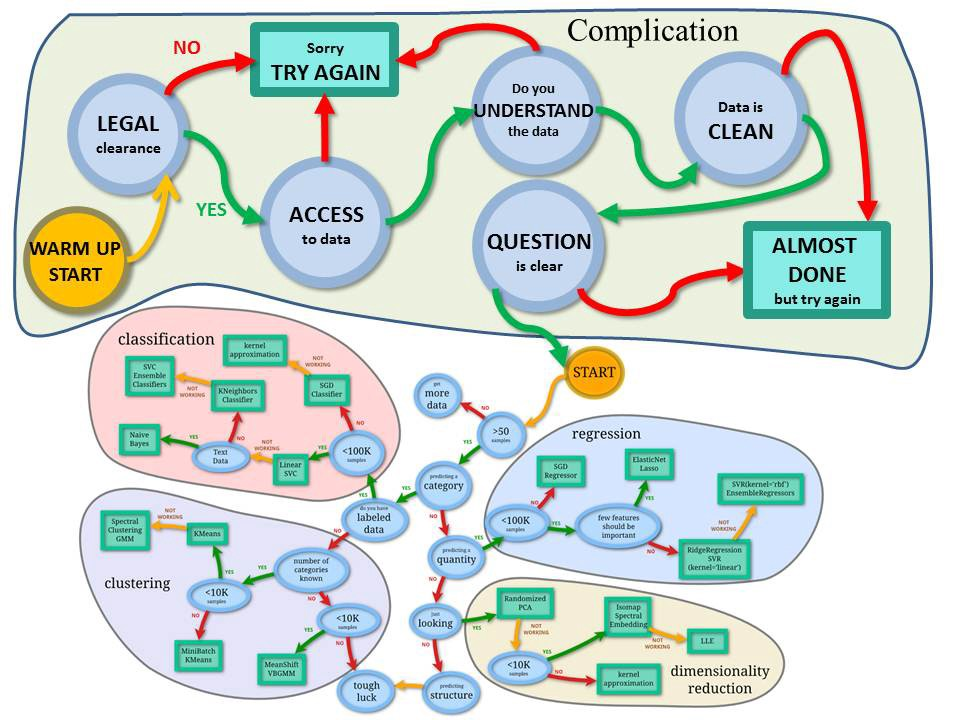

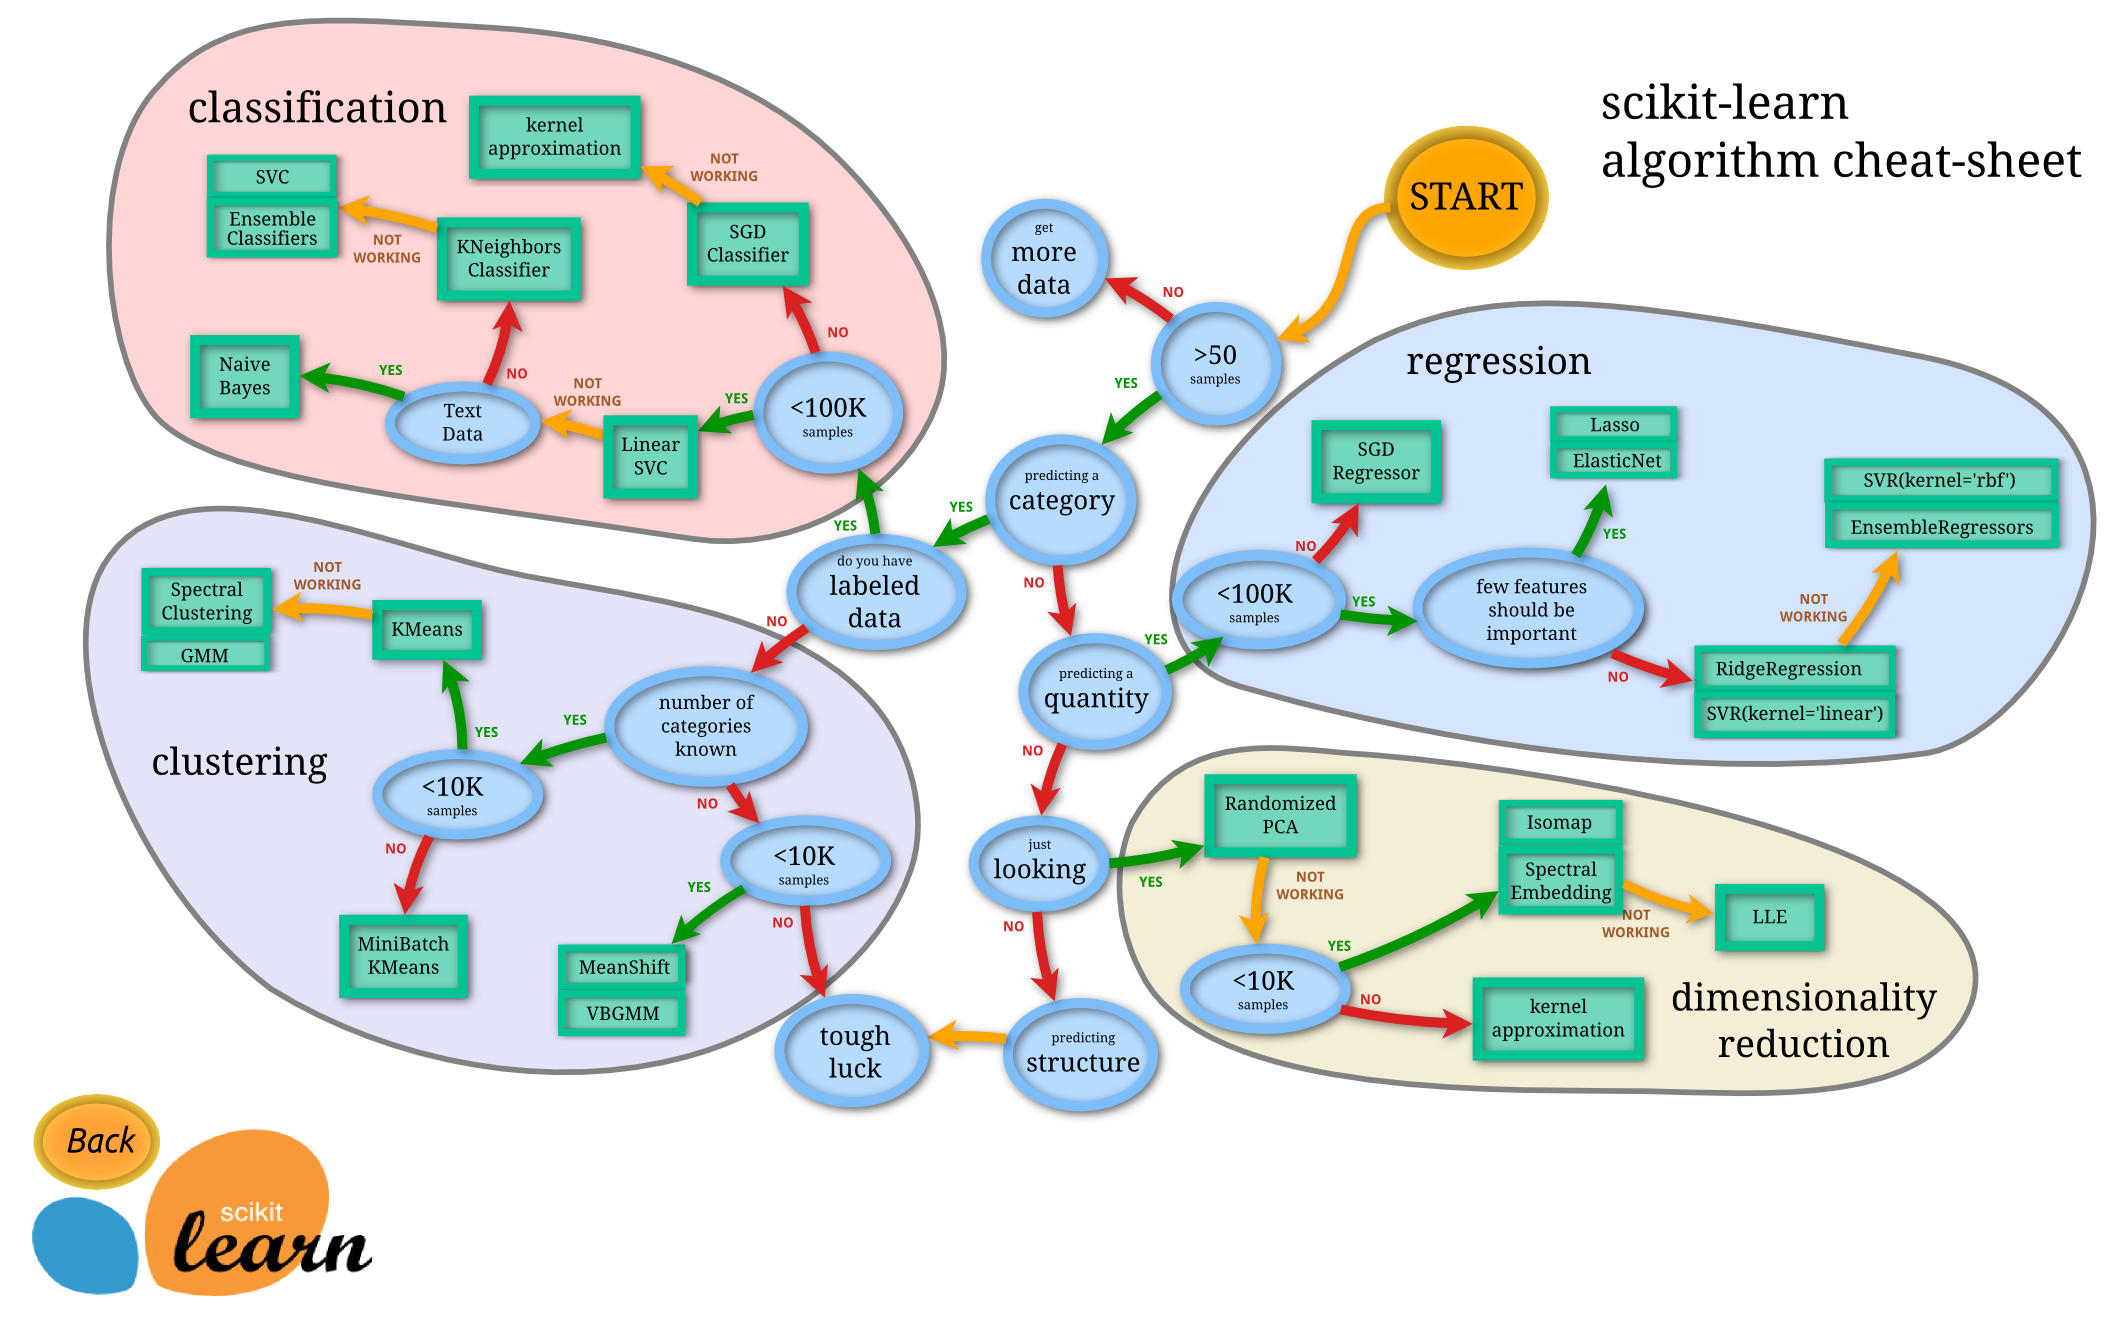

### WorkFlow


1. [Obtener datos](#1.-Obtener-Datos)
2. [Definir objetivo](#2.-Definir-Objetivo)
3. [Limpieza de datos (unidades, outliers, one-hot, etc..)(**)](#3.-Limpieza-de-Datos)
4. [Definir modelo (regresión, clasificación, ...)](#4.-Modelo)
5. [Entrenar (hiperparámetros, validación, ...) (**)](#5.-Entrenamiento)
6. [Predecir (testear)](#6.-Predicción)
7. [Evaluación](#7.-Evaluación)
8. [Si hay mucho error volver a (**)](#WorkFlow)
9. [Super-Bonus H2O](#8.-H2O)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import pylab as plt
import seaborn as sns

%matplotlib inline

### 1. Obtener Datos

**explicacion:**
    
+ carat:	peso del diamante (quilates)

+ cut:	calidad del corte (Fair, Ideal, Good, Very Good, Premium)

+ color: color (D (mejor) a J (peor))

+ clarity: claridad (I1 (peor), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (mejor)) 

+ table: ancho del corte superior del diamante

+ x: largo en mm

+ y: ancho en mm

+ z: alto en mm

+ depth:	2*z/(x+y)

+ price:	precio en dolares USA


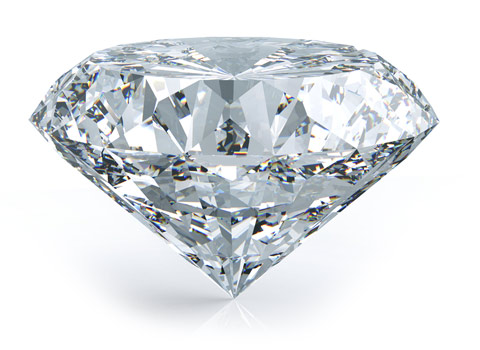

In [2]:
df=pd.read_csv('../Data/diamonds.csv')

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


### 2. Definir Objetivo


```El objetivo del ejercicio consiste en predecir el precio de los diamantes basándonos en datos como el peso, el color, el corte o la claridad.```

### 3. Limpieza de Datos

El proceso de limpieza es el habitual:

+ Valores nulos
+ Datos inconsistentes 
+ Datos duplicados...

Todo esto implica realizar también un **EDA**. Además de eso, es necesario arreglar los datos, proceso llamado `data wrangling`. Este proceso consiste en preparar los datos de manera adecuada para que el modelo de machine learning "entienda" los datos de manera óptima. Por ejemplo, los datos de corte, color y claridad son datos categóricos que están en formato string, habrá que cambiar estos datos para alimentar al modelo, las máquinas solo entienden de números 🤣.

Este proceso no es solo necesario sino fundamental. **Todo está en los datos.**

In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 9.2 MB


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,40455.0,NaN,NaN,NaN,0.797706,0.475544,0.2,0.4,0.7,1.04,4.5
cut,40455,5,Ideal,16220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,40455,7,G,8455,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,40455,8,SI1,9749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,40455.0,NaN,NaN,NaN,61.752841,1.431725,43.0,61.0,61.8,62.5,79.0
table,40455.0,NaN,NaN,NaN,57.446133,2.233535,43.0,56.0,57.0,59.0,95.0
price,40455.0,NaN,NaN,NaN,3928.444469,3992.416147,326.0,945.0,2397.0,5331.0,18823.0
x,40455.0,NaN,NaN,NaN,5.729392,1.124453,0.0,4.71,5.69,6.54,10.23
y,40455.0,NaN,NaN,NaN,5.732819,1.14665,0.0,4.72,5.71,6.54,58.9
z,40455.0,NaN,NaN,NaN,3.537154,0.697062,0.0,2.91,3.52,4.035,8.06


In [8]:
df1 = df.drop(['cut', 'color', 'clarity'], axis=1)

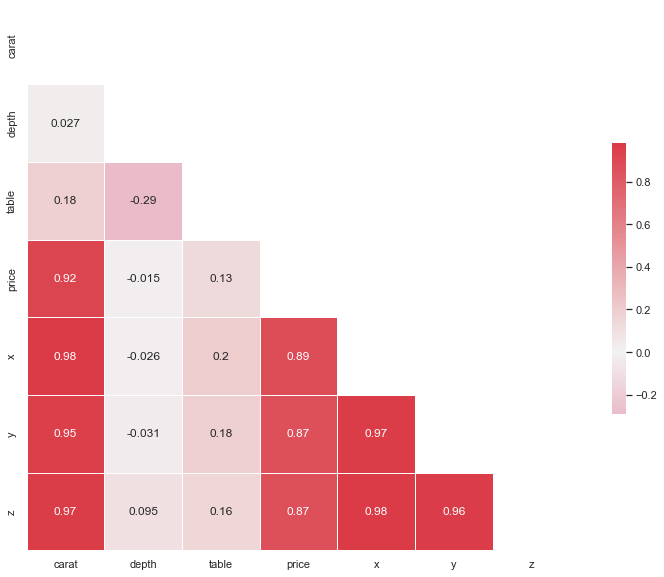

In [9]:
# buscando colinealidad solo columnas numéricas por eso filtramos el df

plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(df1.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(df1.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

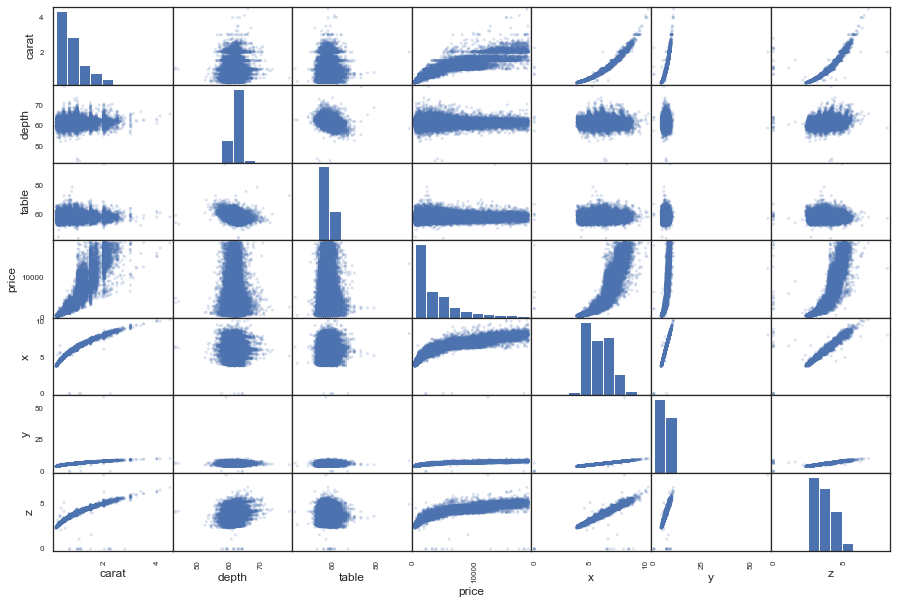

In [7]:
# scatter matrix

pd.plotting.scatter_matrix(df, figsize=(15, 10), alpha=0.2);

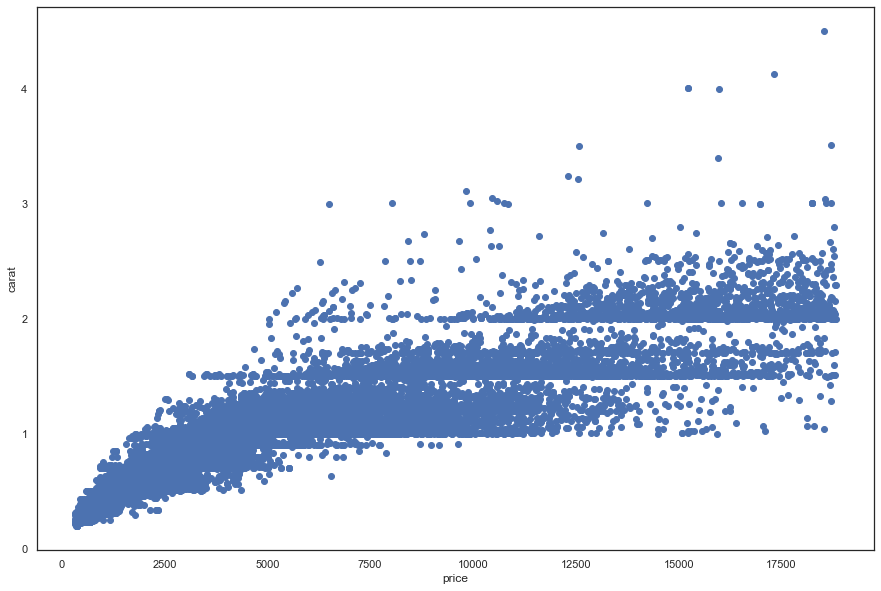

In [10]:
plt.figure(figsize=(15,10))

plt.scatter(df.price, df.carat)

plt.ylabel('carat')
plt.xlabel('price');

In [11]:
# transformando carat con boxcox

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html

from scipy.stats import boxcox

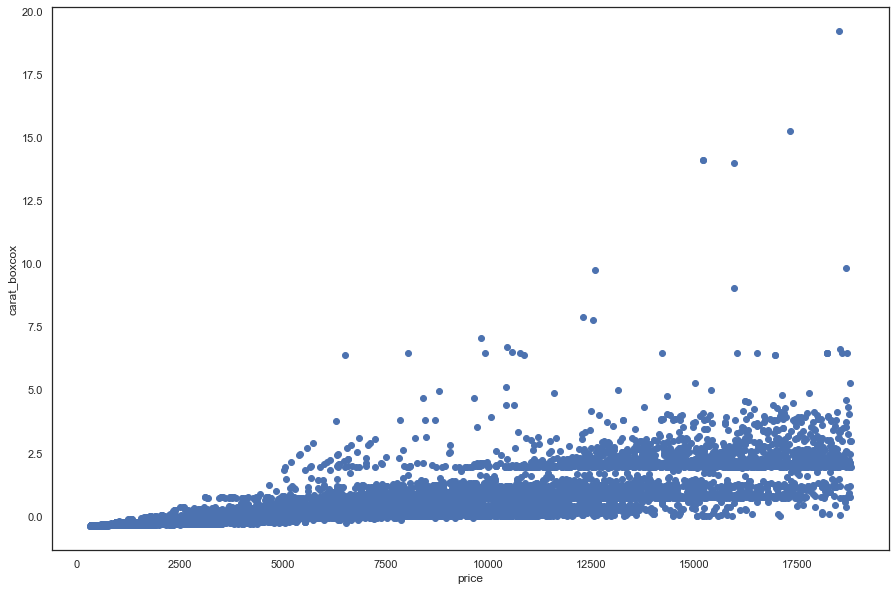

In [12]:
plt.figure(figsize=(15,10))


carat_boxcox=boxcox(df.carat, lmbda=2.618033)

plt.scatter(df.price, carat_boxcox)
plt.xlabel('price')
plt.ylabel('carat_boxcox');

## Reflexión : ¿Cómo podemos asegurarnos de que de verdad son diamantes?

1 carat es igual a 200mg de diamante.

Densidad del diamante es 2,26 gm/cm3

In [13]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


In [14]:
df2=df.copy()

df2['gr'] = 0.2 * df2.carat

df2['vol']=df2.x * df2.y * df2.z / 2.5 / 1000

df2['density']= df2.gr / df2.vol

df2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,gr,vol,density
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25,0.242,0.078839,3.069559
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75,0.064,0.020958,3.053683
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65,0.142,0.045375,3.129493
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00,0.082,0.026508,3.093462
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95,0.204,0.067372,3.027965


In [15]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,40455.0,0.797706,0.475544,0.200000,0.400000,0.700000,1.040000,4.500000e+00
depth,40455.0,61.752841,1.431725,43.000000,61.000000,61.800000,62.500000,7.900000e+01
table,40455.0,57.446133,2.233535,43.000000,56.000000,57.000000,59.000000,9.500000e+01
price,40455.0,3928.444469,3992.416147,326.000000,945.000000,2397.000000,5331.000000,1.882300e+04
x,40455.0,5.729392,1.124453,0.000000,4.710000,5.690000,6.540000,1.023000e+01
y,40455.0,5.732819,1.146650,0.000000,4.720000,5.710000,6.540000,5.890000e+01
z,40455.0,3.537154,0.697062,0.000000,2.910000,3.520000,4.035000,8.060000e+00
gr,40455.0,0.159541,0.095109,0.040000,0.080000,0.140000,0.208000,9.000000e-01
vol,40455.0,0.051921,0.031562,0.000000,0.025956,0.045876,0.068338,1.536239e+00
density,40455.0,inf,NaN,0.260376,3.023931,3.058436,3.095017,inf


In [16]:
df2[df2.density > 4].shape

(27, 13)

## Separación de datos.

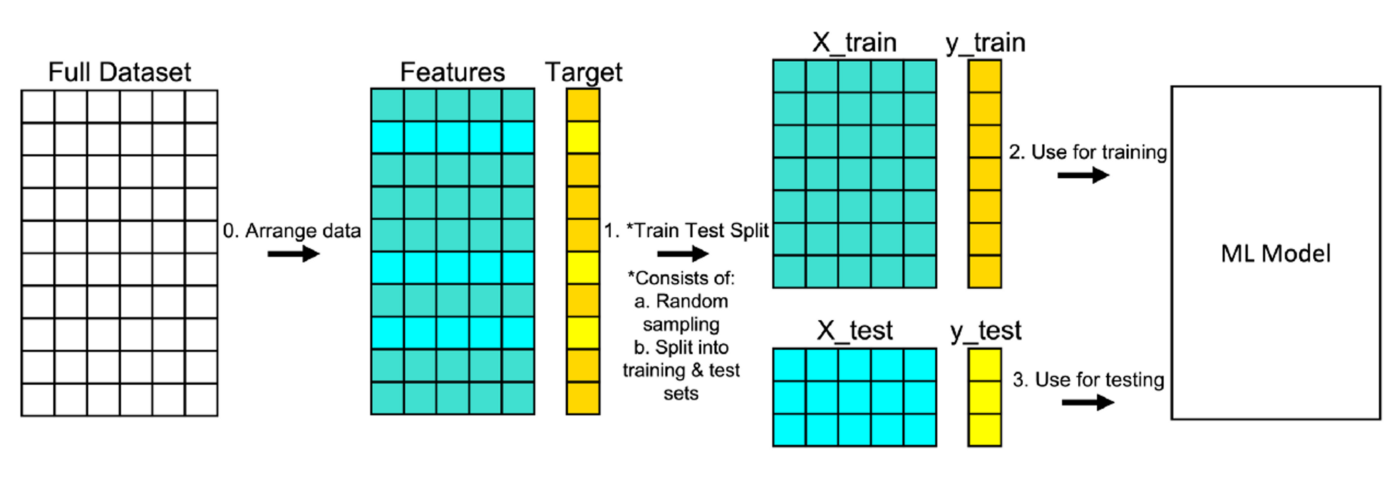

Antes de transformar definitivamente nada, vamos a separar los datos en X e y. y será la columna objetivo, es decir, el precio. La columna objetivo nunca se toca, nunca se transforma en ningún sentido. X serán el resto de columnas, la características con las que realizaremos nuestras predicciones.

**0 arreglar datos**

In [48]:
X = df.drop('price', axis=1)

y = df.price

X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,6.55,6.51,3.95


In [49]:
from sklearn.model_selection import train_test_split as tts # el alias es cosa mia

X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=22)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32364, 9), (8091, 9), (32364,), (8091,))

In [50]:
# transformacion boxcox

X_train.carat=boxcox(X_train.carat, lmbda=2.618033)
X_test.carat=boxcox(X_test.carat, lmbda=2.618033)

X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
20820,-0.337444,Good,D,VS2,60.6,64.0,4.97,4.89,2.99
32405,-0.277251,Premium,F,VVS2,59.7,58.0,5.56,5.53,3.31
1482,-0.365631,Premium,G,VS2,60.6,60.0,4.34,4.30,2.62
4884,-0.226149,Very Good,D,SI2,59.6,63.0,5.80,5.71,3.44
38970,-0.344959,Premium,F,SI1,59.8,59.0,4.85,4.82,2.89


In [51]:
X_train=X_train.drop('table', axis=1)
X_test=X_test.drop('table', axis=1)

X_test.head()

,carat,cut,color,clarity,depth,x,y,z
2227,0.010081,Premium,F,SI2,62.2,6.43,6.36,3.98
26308,0.000000,Ideal,G,VVS2,61.1,6.43,6.47,3.94
547,-0.092078,Premium,E,SI2,60.8,6.21,6.25,3.79
34504,0.722208,Good,G,I1,64.0,7.15,7.04,0.00
25620,-0.231830,Ideal,G,VS1,60.6,5.70,5.75,3.47


In [52]:
X_train = X_train.dropna()

In [53]:
X_train[['depth', 'x', 'y', 'z']]

,depth,x,y,z
20820,60.6,4.97,4.89,2.99
32405,59.7,5.56,5.53,3.31
1482,60.6,4.34,4.30,2.62
4884,59.6,5.80,5.71,3.44
38970,59.8,4.85,4.82,2.89
...,...,...,...,...
20971,59.2,5.80,5.85,3.45
23030,59.6,7.48,7.58,4.49
24932,61.1,6.39,6.50,3.94
31680,63.3,4.62,4.58,2.91


In [54]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train[['depth', 'x', 'y', 'z']]=scaler.fit_transform(X_train[['depth', 'x', 'y', 'z']])

X_train.head()

,carat,cut,color,clarity,depth,x,y,z
20820,-0.337444,Good,D,VS2,-0.802309,-0.674576,-0.729835,-0.785313
32405,-0.277251,Premium,F,VVS2,-1.429820,-0.149340,-0.174874,-0.325288
1482,-0.365631,Premium,G,VS2,-0.802309,-1.235422,-1.241439,-1.317216
4884,-0.226149,Very Good,D,SI2,-1.499544,0.064315,-0.018792,-0.138403
38970,-0.344959,Premium,F,SI1,-1.360097,-0.781404,-0.790533,-0.929070


In [55]:
X_test[['depth', 'x', 'y', 'z']]=scaler.transform(X_test[['depth', 'x', 'y', 'z']])


In [56]:
X_test.head()

,carat,cut,color,clarity,depth,x,y,z
2227,0.010081,Premium,F,SI2,0.313267,0.625160,0.544840,0.637889
26308,0.000000,Ideal,G,VVS2,-0.453692,0.625160,0.640224,0.580386
547,-0.092078,Premium,E,SI2,-0.662862,0.429310,0.449456,0.364749
34504,0.722208,Good,G,I1,1.568289,1.266127,1.134485,-5.083669
25620,-0.231830,Ideal,G,VS1,-0.802309,-0.024708,0.015893,-0.095276


**transformando categoricas de varias maneras**

In [57]:
# one-hot encoding , variables dummies (esto funciona muy bien en regresion)
 
X_train=pd.get_dummies(X_train, columns=['cut'])   # drop_first=True, por defecto es False 

X_train.head()

,carat,color,clarity,depth,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
20820,-0.337444,D,VS2,-0.802309,-0.674576,-0.729835,-0.785313,0,1,0,0,0
32405,-0.277251,F,VVS2,-1.429820,-0.149340,-0.174874,-0.325288,0,0,0,1,0
1482,-0.365631,G,VS2,-0.802309,-1.235422,-1.241439,-1.317216,0,0,0,1,0
4884,-0.226149,D,SI2,-1.499544,0.064315,-0.018792,-0.138403,0,0,0,0,1
38970,-0.344959,F,SI1,-1.360097,-0.781404,-0.790533,-0.929070,0,0,0,1,0


In [58]:
X_test=pd.get_dummies(X_test, columns=['cut'])   # drop_first=True, por defecto es False 

X_test.head()

,carat,color,clarity,depth,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
2227,0.010081,F,SI2,0.313267,0.625160,0.544840,0.637889,0,0,0,1,0
26308,0.000000,G,VVS2,-0.453692,0.625160,0.640224,0.580386,0,0,1,0,0
547,-0.092078,E,SI2,-0.662862,0.429310,0.449456,0.364749,0,0,0,1,0
34504,0.722208,G,I1,1.568289,1.266127,1.134485,-5.083669,0,1,0,0,0
25620,-0.231830,G,VS1,-0.802309,-0.024708,0.015893,-0.095276,0,0,1,0,0


In [59]:
X.clarity.value_counts()

SI1     9749
VS2     9248
SI2     6929
VS1     6066
VVS2    3799
VVS1    2774
IF      1327
I1       563
Name: clarity, dtype: int64

clarity: claridad (I1 (peor), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (mejor))

In [60]:
clarity_dict = {
    "I1"  : 1,
    'SI2' : 2,
    'SI1' : 3,
    'VS2' : 4,
    'VS1' : 5,
    'VVS2': 6,
    'VVS1': 7,
    'IF'  : 8
}

In [61]:
# label encoder a mano porque no había los mismos colores en train y test


X_train.clarity = X_train.clarity.apply(lambda x: clarity_dict[x])
X_test.clarity  = X_test.clarity.apply(lambda x: clarity_dict[x])

X_test.head()

,carat,color,clarity,depth,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
2227,0.010081,F,2,0.313267,0.625160,0.544840,0.637889,0,0,0,1,0
26308,0.000000,G,6,-0.453692,0.625160,0.640224,0.580386,0,0,1,0,0
547,-0.092078,E,2,-0.662862,0.429310,0.449456,0.364749,0,0,0,1,0
34504,0.722208,G,1,1.568289,1.266127,1.134485,-5.083669,0,1,0,0,0
25620,-0.231830,G,5,-0.802309,-0.024708,0.015893,-0.095276,0,0,1,0,0


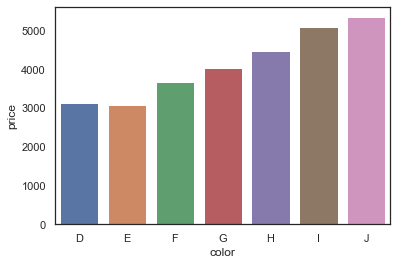

In [62]:
sns.barplot(df.groupby('color').mean().index, 
            df.groupby('color').mean().price);

In [63]:
# label encoder custom

color={'J': 1, 'I': 2, 'H': 5, 'G':15, 'F': 25, 'E': 30, 'D':45}  # aqui es donde entra el conocimiento experto


def cambio_color(x):   #esto es la lambda
    return color[x]    # x es una key del diccionario color, color[x] es el value

#X.color=X.color.apply(cambio_color)

X_train.color = X_train.color.apply(lambda x: color[x])
X_test.color = X_test.color.apply(lambda x: color[x])

X_test.head()

,carat,color,clarity,depth,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
2227,0.010081,25,2,0.313267,0.625160,0.544840,0.637889,0,0,0,1,0
26308,0.000000,15,6,-0.453692,0.625160,0.640224,0.580386,0,0,1,0,0
547,-0.092078,30,2,-0.662862,0.429310,0.449456,0.364749,0,0,0,1,0
34504,0.722208,15,1,1.568289,1.266127,1.134485,-5.083669,0,1,0,0,0
25620,-0.231830,15,5,-0.802309,-0.024708,0.015893,-0.095276,0,0,1,0,0


In [65]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((32364, 12), (32364,), (8091, 12), (8091,))

Ahora ya podemos alimentar el modelo predictivo. Probaremos distintos modelos.

### 4. Modelo

**Regresión Lineal**

In [66]:
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import Lasso        # regularizacion L1
from sklearn.linear_model import Ridge        # regularizacion L2
from sklearn.linear_model import ElasticNet   # regularizacion L1+L2


# se inician los modelos
linreg=LinReg()
lasso=Lasso()
ridge=Ridge()
elastic=ElasticNet()

**SVR**

In [67]:
from sklearn.svm import SVR  # support vector regressor

svr=SVR()

**Random Forest**

In [68]:
from sklearn.ensemble import RandomForestRegressor as RFR  
from sklearn.tree import ExtraTreeRegressor as ETR

rfr=RFR()
etr=ETR()

**Boosting**

In [ ]:
#!pip install xgboost
#!pip install catboost
#!pip install lightgbm

In [69]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

from xgboost import XGBRegressor as XGBR

from catboost import CatBoostRegressor as CTR

from lightgbm import LGBMRegressor as LGBMR


gbr=GBR()
xgbr=XGBR()
ctr=CTR()
lgbmr=LGBMR()

### 5. Entrenamiento

In [73]:
# regresiones lineales

linreg.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
elastic.fit(X_train, y_train)

ElasticNet()

In [74]:
X_train.columns

Index(['carat', 'color', 'clarity', 'depth', 'x', 'y', 'z', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good'],
      dtype='object')

In [75]:
df.price.mean()

3928.444469163268

In [76]:
lasso.coef_   # betas desde b1

array([ 2217.50054113,    33.10682123,   524.09903071,   109.09047319,
        2602.51570353,   117.38184084,   143.34413081, -1057.86740484,
        -187.63241624,    62.38871891,     0.        ,    22.97989197])

In [77]:
lasso.intercept_  # beta0 oredenada en el origen

1157.4340690441104

In [78]:
# svr

svr.fit(X_train, y_train)

SVR()

In [79]:
# rfr y etr

rfr.fit(X_train, y_train)
etr.fit(X_train, y_train)

ExtraTreeRegressor()

In [80]:
# boosting

gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [81]:
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [82]:
ctr.fit(X_train, y_train, verbose=0)

In [83]:
lgbmr.fit(X_train, y_train)

LGBMRegressor()

In [84]:
# entrenamiento a cuchillo


modelos=[linreg, lasso, ridge, xgbr]

for m in modelos:
    m.fit(X_train, y_train)

### 6. Predicción

In [85]:
# regresion lineal

linreg.predict(X_test)[:10]

array([ 4874.28961548,  6598.27627074,  4143.25637564,  6404.66540096,
        3658.44638453,  1652.9483351 ,  2254.04924521,  4476.55525771,
        4405.61724346, 13732.64346133])

In [86]:
lasso.predict(X_test)[:10]

array([ 4872.21355067,  6596.86116061,  4144.66925138,  6462.65333854,
        3659.21912807,  1649.80963371,  2248.92589848,  4470.60015169,
        4402.85343294, 13718.89707468])

In [87]:
ridge.predict(X_test)[:10]

array([ 4874.23399024,  6598.26706206,  4143.52639915,  6368.47508602,
        3658.61192827,  1652.73876639,  2253.84055969,  4476.7007835 ,
        4405.81878388, 13732.36627571])

In [88]:
elastic.predict(X_test)[:10]

array([ 5092.40868831,  6249.8147069 ,  4574.57263965,   776.27299526,
        3870.68377114,  1245.82482786,  1704.69494518,  4904.51299327,
        4485.7154926 , 11197.35302594])

In [89]:
# svr

svr.predict(X_test)[:10]

array([2379.55245828, 2644.37050814, 2188.96535183, 2543.0425043 ,
       2541.11084754, 1858.51416432, 1753.16868688, 3118.48392885,
       2082.27284293, 3466.98252747])

In [90]:
y_test[:10]

2227      4796
26308     9294
547       3662
34504     4731
25620     2512
37385      982
36691     1018
35008     4702
17736     3601
2115     16629
Name: price, dtype: int64

In [91]:
# rfr

rfr.predict(X_test)[:10]

array([ 4416.38 ,  7924.92 ,  3778.52 ,  4289.17 ,  3101.97 ,   969.99 ,
        1074.98 ,  4661.38 ,  3827.358, 13976.89 ])

In [92]:
# etr

etr.predict(X_test)[:10]

array([ 4416.,  7885.,  3845.,  8971.,  3384.,  1034.,  1095.,  4830.,
        3582., 15036.])

In [93]:
# boosting

gbr.predict(X_test)[:10]

array([ 4373.2572603 ,  8508.068643  ,  3621.25561612,  4837.28518656,
        2855.78567975,  1042.77116876,  1028.74892669,  4502.4530136 ,
        3759.01105677, 14565.22149851])

In [94]:
xgbr.predict(X_test)[:10]

array([ 4101.596 ,  7996.184 ,  3676.3271,  3627.917 ,  3013.2117,
         943.9924,  1022.2941,  4525.8296,  3704.4368, 13995.861 ],
      dtype=float32)

In [95]:
ctr.predict(X_test)[:10]

array([ 4138.33019598,  7793.26370773,  3666.81570766,  5795.29967124,
        2945.02714303,  1038.72538163,  1090.09645254,  4565.74224733,
        3714.74994497, 14156.30209125])

In [96]:
lgbmr.predict(X_test)[:10]

array([ 4173.63788749,  7853.74116425,  3648.63857012,  4330.6541901 ,
        2838.66031825,   913.00388891,   986.05058381,  4521.40427832,
        3741.24517243, 13559.09661028])

### 7. Evaluación

In [97]:
y_test.head()

2227     4796
26308    9294
547      3662
34504    4731
25620    2512
Name: price, dtype: int64

In [98]:
from sklearn.metrics import mean_squared_error as mse  # error cuadratico medio

In [104]:
# regresion lineal

y_pred=linreg.predict(X_test)
train_pred=linreg.predict(X_train)

mse(y_train, train_pred, squared=False), mse(y_test, y_pred, squared=False)  # RMSE squared=False por la raiz cuadrada

(1364.72179405898, 1443.4705422587851)

In [105]:
# lasso

y_pred=lasso.predict(X_test)
train_pred=lasso.predict(X_train)

mse(y_train, train_pred, squared=False), mse(y_test, y_pred, squared=False) 

(1364.7466631625757, 1443.4675454873127)

In [106]:
# ridge

y_pred=ridge.predict(X_test)
train_pred=ridge.predict(X_train)

mse(y_train, train_pred, squared=False), mse(y_test, y_pred, squared=False) 

(1364.7219761573965, 1443.4742797274405)

In [107]:
# elastic

y_pred=elastic.predict(X_test)
train_pred=elastic.predict(X_train)

mse(y_train, train_pred, squared=False), mse(y_test, y_pred, squared=False) 

(1609.740689931435, 1631.1421344516236)

In [108]:
# rfr

y_pred=rfr.predict(X_test)
train_pred=rfr.predict(X_train)

mse(y_train, train_pred, squared=False), mse(y_test, y_pred, squared=False)   # RMSE

(203.6432028031228, 576.8392438266261)

In [109]:
# etr

y_pred=etr.predict(X_test)
train_pred=etr.predict(X_train)

mse(y_train, train_pred, squared=False), mse(y_test, y_pred, squared=False)  # RMSE

(12.779843849129797, 741.9495777285639)

In [110]:
# svr

y_pred=svr.predict(X_test)
train_pred=svr.predict(X_train)

mse(y_train, train_pred, squared=False), mse(y_test, y_pred, squared=False)  # RMSE

(4036.431348507418, 4073.2188415305027)

In [111]:
# boosting

y_pred=xgbr.predict(X_test)
train_pred=xgbr.predict(X_train)

mse(y_train, train_pred, squared=False), mse(y_test, y_pred, squared=False)  # RMSE

(348.84413312237723, 577.045216638522)

In [112]:
y_pred=ctr.predict(X_test)
train_pred=ctr.predict(X_train)

mse(y_train, train_pred, squared=False), mse(y_test, y_pred, squared=False)  # RMSE

(419.7326045526842, 560.0967908507315)

In [113]:
dict(zip(X_train.columns, linreg.coef_))

{'carat': 2221.0832782702464,
 'color': 33.15312429353082,
 'clarity': 524.2344711636229,
 'depth': 111.65126544327896,
 'x': 2596.5719505808574,
 'y': 115.316079127785,
 'z': 151.45687481173582,
 'cut_Fair': -856.7165802976664,
 'cut_Good': 40.47769596911439,
 'cut_Ideal': 306.20823980145633,
 'cut_Premium': 241.8955201015528,
 'cut_Very Good': 268.1351244255389}

### 8. H2O

https://www.cienciadedatos.net/documentos/py04_machine_learning_con_h2o_y_python


In [ ]:
#!pip install h2o

In [114]:
import h2o

from h2o.automl import H2OAutoML

In [115]:
# obtener datos

train=pd.read_csv('../data/diamonds_train.csv')
test=pd.read_csv('../data/diamonds_test.csv')

train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


In [116]:
test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67
1,1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18
2,2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57
3,3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90
4,4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19


In [117]:
# inicializamos el modelo h2o

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.351-b10, mixed mode)
  Starting server from C:\Users\botic\anaconda3\envs\ironhack\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\botic\AppData\Local\Temp\tmplosmgsk4
  JVM stdout: C:\Users\botic\AppData\Local\Temp\tmplosmgsk4\h2o_botic_started_from_python.out
  JVM stderr: C:\Users\botic\AppData\Local\Temp\tmplosmgsk4\h2o_botic_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.3
H2O_cluster_version_age:,"1 year, 4 months and 23 days !!!"
H2O_cluster_name:,H2O_from_python_botic_y7c7s6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.427 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [118]:
# parsear datos para h20

h2train=h2o.H2OFrame(train)
h2test=h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [119]:
h2train.columns

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

In [120]:
X=[c for c in h2train.columns if c!='price']

y='price'

In [121]:
# inicia auto-machine-learning

automl=H2OAutoML(max_models=20,
                 seed=42,   # random_state
                 max_runtime_secs=300,
                 sort_metric='RMSE')

In [122]:
# entrena

automl.train(x=X,
             y=y,
             training_frame=h2train)

AutoML progress: |
19:53:52.126: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_2_AutoML_1_20231201_195352


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,90.0,90.0,92997.0,7.0,7.0,7.0,16.0,127.0,77.611115




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 210111.89499666746
RMSE: 458.3796406873537
MAE: 246.2486816278009
RMSLE: 0.0932166648323716
Mean Residual Deviance: 210111.89499666746

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 284166.38883307995
RMSE: 533.0725924609893
MAE: 273.8156571935144
RMSLE: 0.09943999809669697
Mean Residual Deviance: 284166.38883307995

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,273.952640,3.555779,276.088040,276.602230,268.045040,275.830050,273.197850
1,mean_residual_deviance,284577.530000,3395.161900,287162.970000,287526.250000,283755.700000,285299.600000,279143.160000
2,mse,284577.530000,3395.161900,287162.970000,287526.250000,283755.700000,285299.600000,279143.160000
3,r2,0.982139,0.000406,0.982427,0.981631,0.981864,0.982141,0.982632
4,residual_deviance,284577.530000,3395.161900,287162.970000,287526.250000,283755.700000,285299.600000,279143.160000
5,rmse,533.450440,3.189473,535.875850,536.214700,532.687260,534.134400,528.340000
6,rmsle,0.099437,0.001177,0.100864,0.097928,0.098577,0.100053,0.099761



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2023-12-01 19:54:40,2.916 sec,0.0,3992.366802,3034.065893,1.593899e+07
1,,2023-12-01 19:54:41,2.955 sec,5.0,2439.578371,1820.703949,5.951543e+06
2,,2023-12-01 19:54:41,2.991 sec,10.0,1540.160893,1117.249821,2.372096e+06
3,,2023-12-01 19:54:41,3.030 sec,15.0,1037.496901,722.708172,1.076400e+06
4,,2023-12-01 19:54:41,3.074 sec,20.0,775.355055,508.874088,6.011755e+05
5,,2023-12-01 19:54:41,3.109 sec,25.0,633.277192,388.091158,4.010400e+05
6,,2023-12-01 19:54:41,3.142 sec,30.0,563.524795,323.766298,3.175602e+05
7,,2023-12-01 19:54:41,3.179 sec,35.0,525.836859,289.756848,2.765044e+05
8,,2023-12-01 19:54:41,3.209 sec,40.0,505.656191,272.976675,2.556882e+05
9,,2023-12-01 19:54:41,3.244 sec,45.0,494.657751,263.943502,2.446863e+05



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,carat,1.333713e+12,1.000000,0.429929
1,y,8.622372e+11,0.646494,0.277946
2,x,4.500254e+11,0.337423,0.145068
3,z,1.794924e+11,0.134581,0.057860
4,clarity,1.742048e+11,0.130616,0.056156
5,color,8.909794e+10,0.066804,0.028721
6,cut,6.556646e+09,0.004916,0.002114
7,depth,4.402157e+09,0.003301,0.001419
8,table,2.440331e+09,0.001830,0.000787


In [123]:
print('[INFO] Leader board:')

leader_board=automl.leaderboard

leader_board.head()

[INFO] Leader board:


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_2_AutoML_1_20231201_195352,533.073,284166,273.816,0.09944,284166
GBM_3_AutoML_1_20231201_195352,535.859,287145,272.334,0.0965436,287145
GBM_grid_1_AutoML_1_20231201_195352_model_2,535.911,287201,266.874,0.0887221,287201
GBM_5_AutoML_1_20231201_195352,535.962,287255,278.244,0.101723,287255
GBM_grid_1_AutoML_1_20231201_195352_model_5,536.159,287466,273.278,0.0975584,287466
GBM_4_AutoML_1_20231201_195352,536.671,288015,269.518,0.0923041,288015
GBM_grid_1_AutoML_1_20231201_195352_model_1,538.498,289980,279.415,0.102982,289980
GBM_1_AutoML_1_20231201_195352,543.531,295426,271.173,nan,295426
GBM_grid_1_AutoML_1_20231201_195352_model_4,560.221,313847,281.119,0.0946716,313847
DRF_1_AutoML_1_20231201_195352,573.705,329137,284.935,0.0964363,329137


In [135]:
# prediciones del lider

y_pred=automl.leader.predict(h2test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [136]:
y_pred[:10]

predict
2909.17
5722.77
9673.85
3941.58
1655.03
6310.85
4847.66
4304.62
5369.57
15007.9


In [137]:
#Descargar modelo entrenado

automl.leader.download_model()

'C:\\Users\\botic\\Proyectos\\dsb06rt\\mod5-machine-learning-y-deep-learning\\01_12_2023\\GBM_2_AutoML_1_20231201_195352'

In [140]:
#Cargar un modelo previamente entrenado

modelo = h2o.load_model('GBM_2_AutoML_1_20231201_195352')

In [139]:
modelo.predict(h2test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict
2909.17
5722.77
9673.85
3941.58
1655.03
6310.85
4847.66
4304.62
5369.57
15007.9


In [146]:
catboost_info = pd.read_csv('catboost_info/learn_error.tsv', sep='\t')

In [147]:
catboost_info

,iter,RMSE
0,0,3734.546632
1,1,3500.181156
2,2,3288.588222
3,3,3090.192027
4,4,2903.290201
...,...,...
995,995,420.031423
996,996,419.922897
997,997,419.918366
998,998,419.837362


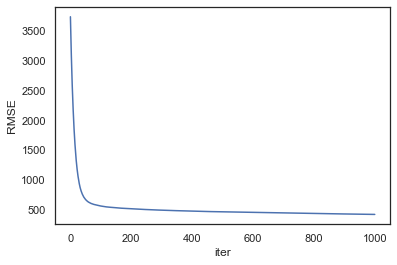

In [148]:
sns.lineplot(data=catboost_info, x='iter', y='RMSE');